In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv("words_glasgow.csv", skipinitialspace=True)
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [44]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier #!!!
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier #!!!

##### Decision Tree Visualization ###
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [45]:
df['emotion']= (df['valence']+ df['dominance']) / 2
df['visual'] = (df['concreteness']+ df['imageability']) / 2

In [46]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,emotion,visual
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,3.5985,4.9230
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,5.2240,5.6250
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,5.2425,3.2315
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,4.0930,2.9415
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,4.3400,2.9315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,5.1665,6.2355
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0,4.3745,3.2955
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,6.4695,4.2355
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,5.8600,6.2795


In [47]:
df2 = df.drop(["word","web_corpus_freq","valence","dominance",
         "concreteness","imageability"], axis=1)

df2.head()

,length,arousal,familiarity,aoa,semsize,gender,polysemy,emotion,visual
0,8,4.200,2.382,6.760,4.652,5.391,0,3.5985,4.9230
1,5,3.125,3.324,5.177,5.121,3.303,0,5.2240,5.6250
2,10,3.273,5.121,5.543,2.667,3.971,0,5.2425,3.2315
3,8,4.194,3.971,6.233,4.679,5.167,0,4.0930,2.9415
4,10,3.846,3.097,6.407,5.083,4.571,0,4.3400,2.9315


In [48]:
# TRAIN_SET & TEST_SET

# test_size = 0.7 TrainSet, 0.3 TestSet
# stratify = ?
# random_state = split specifico, utile x comparazioni

attributes = [col for col in df2.columns if col != 'polysemy']
X = df2[attributes].values
y = df['polysemy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [49]:
print(f"Elementi in df2: \t\t{len(df2)}")
print(f"Elementi in Train_set: \t{X_train.shape[0]}")
print(f"Elementi in Test_set: \t{X_test.shape[0]}")

Elementi in df2: 		4682
Elementi in Train_set: 	3277
Elementi in Test_set: 	1405


In [50]:
# criterion --> criterion for impurity.
# max_depth=None --> ?
# min_samples_split --> min # values in the node to split it, (10) in this case.
# min_samples_leaf --> min # of samples required to be in both left and right child if we want to split the parent

clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None ,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             )

clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

In [51]:
clf.feature_importances_

array([0.12890264, 0.09567206, 0.05498769, 0.1241105 , 0.16327452,
       0.15943884, 0.15488825, 0.11872551])

In [52]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'length': 0.12890263657502884,
 'arousal': 0.09567206081542151,
 'familiarity': 0.05498768544903917,
 'aoa': 0.12411049808539226,
 'semsize': 0.1632745212789059,
 'gender': 0.15943883643371973,
 'emotion': 0.15488825354352523,
 'visual': 0.11872550781896736}

In [53]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'semsize': 0.1632745212789059,
 'gender': 0.15943883643371973,
 'emotion': 0.15488825354352523,
 'length': 0.12890263657502884,
 'aoa': 0.12411049808539226,
 'visual': 0.11872550781896736,
 'arousal': 0.09567206081542151,
 'familiarity': 0.05498768544903917}

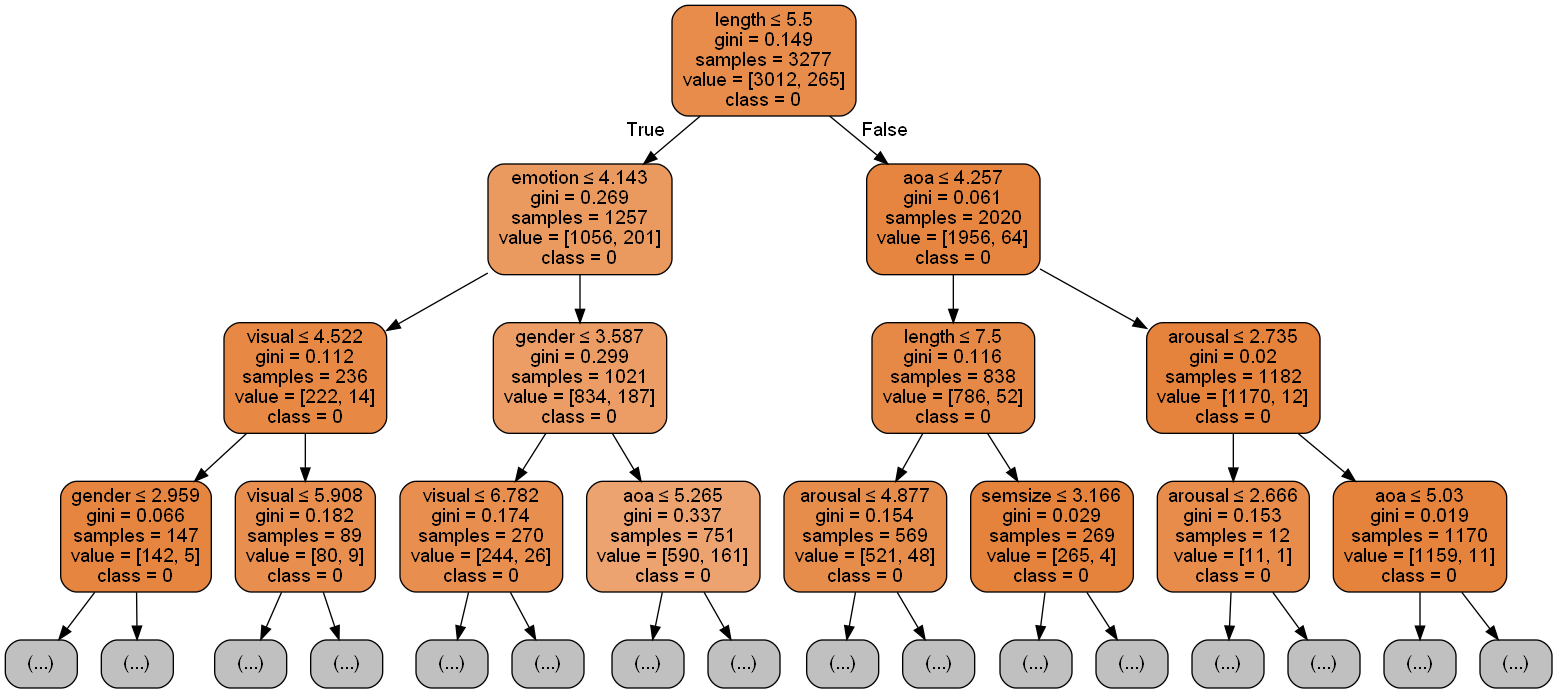

In [54]:
# features_name = nomi delle variabili
# max_depth = livelli visualizzati

dot_data = tree.export_graphviz (clf, out_file=None,
                                 feature_names=attributes,
                                 class_names=[str(v) for v in clf.classes_],
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [55]:
y_pred = clf.predict(X_test)

In [57]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: \t ', f1_score(y_test, y_pred, average=None))

Accuracy:  0.8861209964412812
F1: 	  [0.93897788 0.14893617]


In [59]:
# CONFUSION MATRIX

cf = confusion_matrix(y_test, y_pred, labels=[1,0])

# TP, FN, FP, TN
lista_positivi_e_negativi = cf[0][0], cf[0][1], cf[1][0], cf[1][1]

cf

array([[  14,  100],
       [  60, 1231]], dtype=int64)

In [73]:
y_pred = clf.predict( X_test )

# prediction of a record to belong to the positive class

y_score = clf.predict_proba(X_test)

In [74]:
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.576395966678897


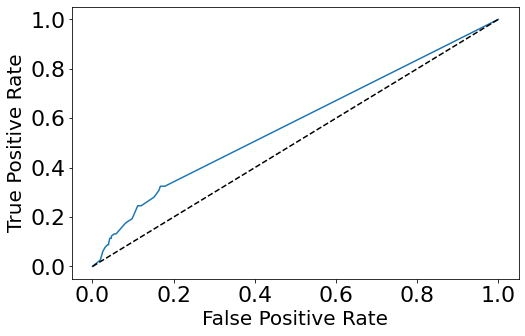

In [63]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)

In [64]:
param_list = {'max_depth': [None] + [2, 3, 4],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]
              }
# scoring = su che tipo di valore

grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
grid_search.fit(X, y)

res = grid_search.cv_results_

In [71]:
grid_search.best_estimator_

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [72]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.155 (std: 0.035)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.154 (std: 0.021)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.148 (std: 0.052)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}



In [33]:
train_pred_dt = clf.predict(X_train) # DT
test_pred_dt = clf.predict(X_test)

# CLASSIFICATION REPORT DECISION TREE

print("CLASSIFICATION REPORT DECISION TREE - TRAIN\n")
print(classification_report(y_train, train_pred_dt))
print()
print("CLASSIFICATION REPORT DECISION TREE - TEST\n")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT DECISION TREE - TRAIN

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3012
           1       0.76      0.54      0.63       265

    accuracy                           0.95      3277
   macro avg       0.86      0.76      0.80      3277
weighted avg       0.94      0.95      0.94      3277


CLASSIFICATION REPORT DECISION TREE - TEST

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1291
           1       0.19      0.13      0.16       114

    accuracy                           0.89      1405
   macro avg       0.56      0.54      0.55      1405
weighted avg       0.87      0.89      0.88      1405



In [77]:
from sklearn import metrics

print("- VALORI DT - \n")

print("Accuracy DT:   \t\t", round(metrics.accuracy_score(y_test, y_pred),3))
print('F1- Score DT:\t\t', round(metrics.f1_score(y_test, y_pred),3))
print("Cross Validation DT:\t", round(scores.mean(),3),"\n")
print('F1: \t ', f1_score(y_test, y_pred, average=None))

- VALORI DT - 

Accuracy DT:   		 0.886
F1- Score DT:		 0.149
Cross Validation DT:	 0.192 

F1: 	  [0.93897788 0.14893617]
